# Assignment 7
### Do any five.

## 1. 

- What is the expected value of a single die roll? 
- What is the expected value of rolling two dice and adding the results together?
- What is the expected winnings of any gamble in European roulette?

- Imagine you roll a die, and you record the value you get. But, if you roll a six, you roll again, and add that value. What is the expected value?
- Imagine that the process described in the last question continues until you fail to roll a six. What is the expected value of the process? (This can be tricky, you can simulate it to get an answer if you prefer. Hint: The answer is 4.2.)

a. (1+2+3+4+5+6)/6=3.5

b.(1/36)2 +(2/36)3+(3/36)4+(4/36)5+(5/36)6+(6/36)7+(5/36)8+(4/36)9+(3/36)10+(2/36)11+(1/36)12=7

c. (x/37)(36/x)+((37-K)/37)(0)-1 = -1/37

d. (1+2+3+4+5)/6 + 1/6(6+3.5) = 24.5/6

e. x = (1+2+3+4+5)/6 + (6+x)/6 =  21/5


## 2. 
- Compute the expected value for a uniform random variable.
- Show that $\mathbb{E}[a+bX] = a + b\mathbb{E}[X]$
- Show, by example, that $v(\mathbb{E}[X]) \neq \mathbb{E}[v(X)]$, if $v(x) \neq a+bx$. For example, try $v(y) = y^2$ or $v(y)=\sqrt{y}$ with a Bernoulli or uniform or normally distributed random variable. This can be an important thing to remember: The expectation of a transformed random variable is not the transformation of the expected value.

![alt text](image5.png)

![alt text](image4.png)

Expected Value: 0.6665956883563889
Value of Expectation: 0.7074211518332095


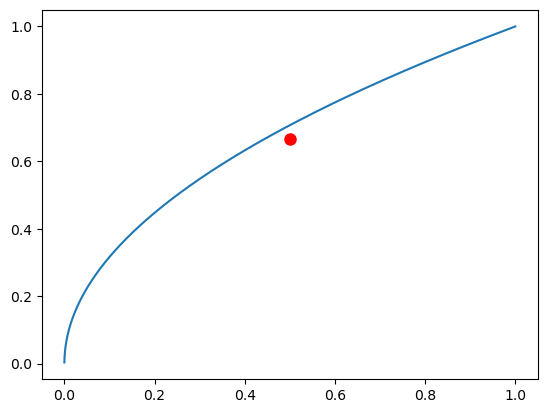

In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

def v(x):
    return np.sqrt(x)

sample = np.random.uniform(low=0, high=1,size = 20000)

Ev_of_sample = np.mean( v(sample) )
print(f'Expected Value: {Ev_of_sample}')

v_of_EX = v(np.mean(sample))
print(f'Value of Expectation: {v_of_EX}')

sns.lineplot(x=sample, y=v(sample))
plt.plot(np.mean(sample),Ev_of_sample, 'o', color='red', markersize=8)


## 3. 
- Compute the variance for a uniform random variable.
- Show that 
$$
\mathbb{V}[X] = \mathbb{E}[X^2] - \mathbb{E}[X]^2
$$
$$
\mathbb{V}[a+bX] = b^2 \mathbb{V}[X]
$$
- Show that if $X$ is a normally distributed random variable, then $a + bX$ is distributed normally with mean $a+ b \mathbb{E}[X]$ and variance $b^2 \sigma_X^2$ 

These properties get used all the time!


![alt text](image3.png)

![alt text](image2.png)

![alt text](image1.png)

![alt text](image0.png)

## 4.

- The **covariance** of $X$ and $Y$ is
$$
\text{cov}(X,Y) = \int_{y} \int_{x} (x-\mathbb{E}[X])(y-\mathbb{E}[Y])f_{XY}(x,y) dxdy = \mathbb{E}_{XY}[ (x-\mu_X)(y-\mu_Y)]
$$
- Show that if $f_{XY}(x,y)=f_X(x)f_Y(y)$, then $\text{cov}(X,Y)=0$
- Provide an example (computation/simulation is fine) where $\text{cov}(X,Y)\approx 0$ but $f_{XY}(x,y)\neq 0$
- The covariance doesn't characterize joint random variables except in a few special cases: The covariance only captures the **linear** association between the two variables, not nonlinear associations.

![alt text](image6.png)

if Y=|x| std.dev*e where x has a std normal deviation, then both have a non-trivial density

## 8.
- Open the METABRIC data. Make a histogram of 'Ratio Therapy'.
- Let treatment, $T$ be distributed binomial with parameter $p$. Then the contribution to the likelihood for each patient $i$, with $y_i = 0$ for no radiation therapy and $y_i=1$ for radiation therapy, is 
$$
p^{y_i}(1-p)^{1-y_i}
$$
- Write out the likelihood.
- Maximize the likelihood with respect to $p$. What is the MLE, $\hat{p}$?
- Bootstrap the sampling density/distribution of $\hat{p}$.

<Axes: xlabel='Radio Therapy', ylabel='Proportion'>

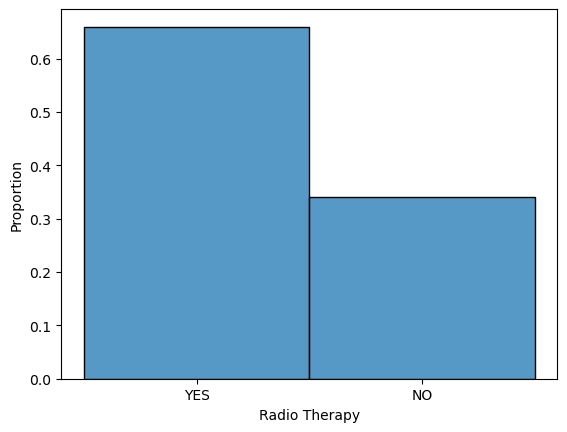

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp 

df = pd.read_csv('./data/metabric.csv')

y = df['Radio Therapy']
sns.histplot(y,stat='proportion')

![alt text](image7.png)

MLE:  0.659717051377513


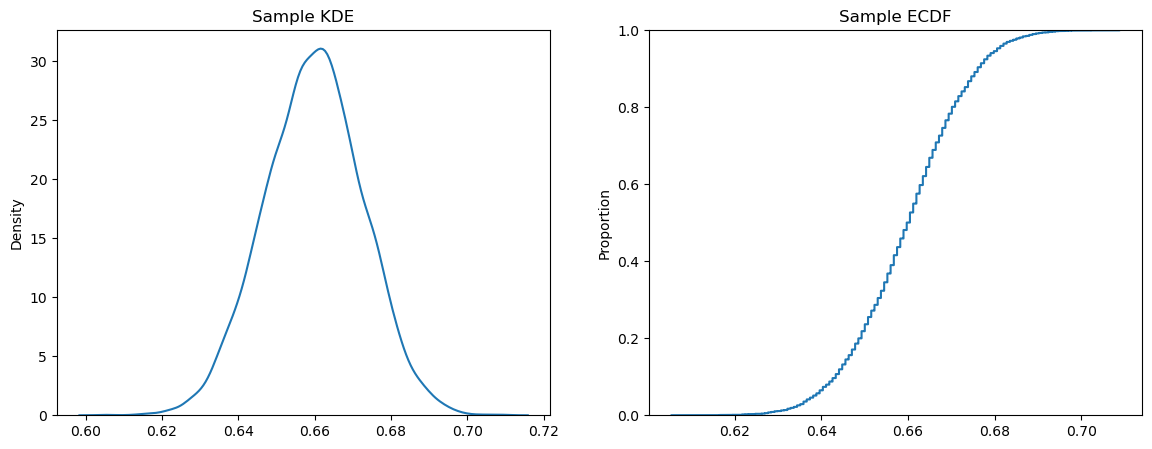

In [ ]:
y = pd.to_numeric( y.replace({'NO':'0','YES':'1'}) , errors='coerce' )
print(f'MLE: ', y.mean())

S = 5000
sample = [ np.mean( y.sample(frac=1,replace=True) ) for s in range(S) ]

fig, axes = plt.subplots(1,2,figsize=(14,5))
sns.kdeplot(x=sample,ax=axes[0],label='kde')
axes[0].set_title('Sample KDE')
sns.ecdfplot(x=sample,ax=axes[1],label='ecdf')
axes[1].set_title('Sample ECDF')
plt.show()